# Data Challenge - Classification

# Determining Survivial Rate From Thoracic Surgery Data

In [3]:
library(dplyr)
library(ggplot2)
library(readr)
library(boot)
library(broom)
library(ISLR)
library(MASS)
library(class)
library(tree)
library(randomForest)
library(leaps)
library(glmnet)
#Include additional R packages as required

### Load data

In [4]:
Thoracic = read.csv("ThoracicSurgery.csv")

## Introduction

## Thoracic Surgery

The data was collected at the Wroclaw Thoracic Surgery Centre for patients who underwent
major lung surgery for lung cancer in the years 2007 - 2011. The Centre is associated with the
Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian
Centre for Pulmonary Diseases, Poland. The ThoracicSurgery dataset contains information for
approximately 470 patients. There are seventeen variables recorded for each patient. The
objective is to predict whether the patient survives the first year following surgery (Death_1yr).

The `ThoracicSurgery` dataset contains the following 17 Variables for the 470 patients:
* `Diagnosis` : ICD-10 codes for primary and secondary as well multiple tumours if any (‘DGN1’,‘DGN2’, ’DGN3’, ’DGN4’, ’DGN5’, ’DGN6’, ’DGN8’)
* `FVC` : Forced vital capacity - Amount of air which can be forcibly exhaled from the
lungs after taking the deepest breath possible
* `FEV` : Volume that has been exhaled at the end of the first second of forced expiration
(FEV)
* `Performance` : Performance status on Zubrod scale (‘PRZ0’ - Good , ‘PRZ1’, ‘PRZ2’ - Poor)
* `Pain` : Pain before surgery (‘T’, ‘F’)
* `Haemoptysis` : Coughing up blood before surgery (‘T’, ’F’)
* `Dyspnoea` : Difficult or laboured breathing before surgery (‘T’, ’F’)
* `Cough` : Symptoms of coughing before surgery (‘T’, ’F’)
* `Weakness` : Weakness before surgery (‘T’, ’F’)
* `Tumor_Size` : Size of the original tumor, from ‘OC11’ (smallest) to ‘OC14’ (largest)
* `Diabetes` : Type 2 Diabetes mellitus (‘T’, ’F’)
* `MI_6mo` : Myocardial infarction up to 6 months prior (‘T’, ’F’)
* `PAD` : Peripheral arterial diseases (‘T’, ’F’)
* `Smoking` : Patient smoked (‘T’, ’F’)
* `Asthma` : Patient has asthma (‘T’, ’F’)
* `Age` : Age at surgery (years)
* `Death_1yr` : One year survival period - (T) value if died (‘T’, ’F’) 

## Exploratory Analysis

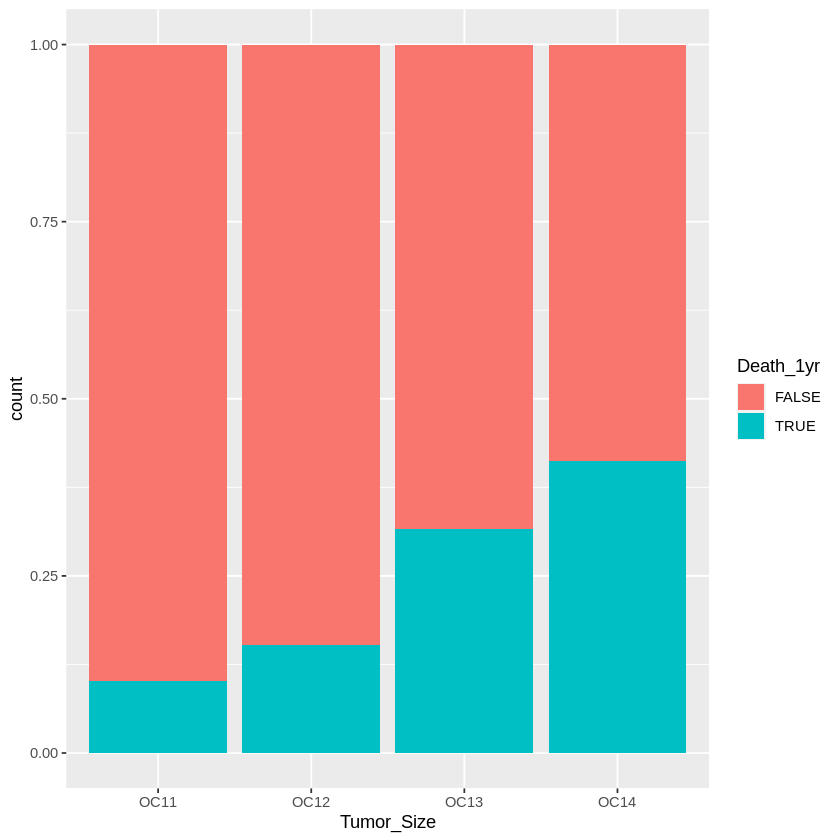

In [5]:
ggplot(Thoracic, aes(fill = Death_1yr, x = Tumor_Size)) + 
 geom_bar(position = "fill") 

This plot is able to show the relationship between tumor size and if the pateinet survived after 1 year. In this plot, True represents when the patient has died within the first year after surgery, and false if the patient has survived. According to this plot, the patient has a higher chance of dying if the tumor has a size of OC13 or OC14. The larger the tumor size the more likely the patient has died.

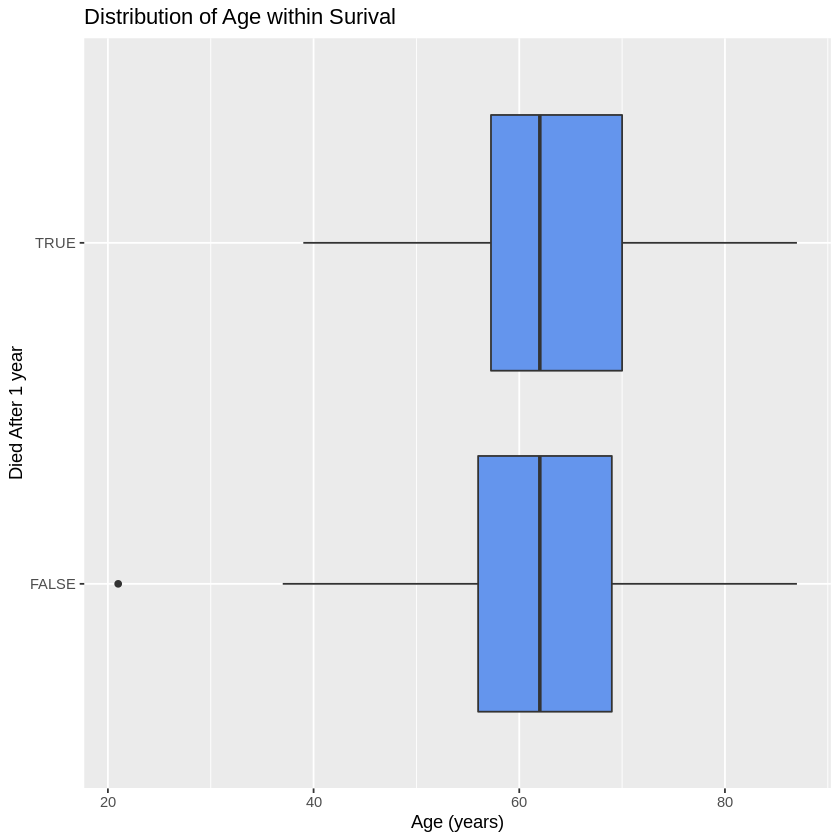

In [6]:
ggplot(Thoracic, aes(x = Age, y = Death_1yr)) +
geom_boxplot(fill = "CornflowerBlue") +
labs(title = "Distribution of Age within Surival", x = "Age (years)", y = "Died After 1 year")

This plot shows the relationship between death after 1 year and age at the time of surgery. This plot shows that Age doesn't have an inpact on dying after the first year. There are other factors that are better at determing survival rate after one year.

In [6]:
table(Death_After_1yr = Thoracic$Death_1yr, Diagnosis = Thoracic$Diagnosis)

               Diagnosis
Death_After_1yr DGN1 DGN2 DGN3 DGN4 DGN5 DGN6 DGN8
          FALSE    1   40  306   40    8    4    1
          TRUE     0   12   43    7    7    0    1

This table shows the relationship between the diagnosis and the one year survival period. According to this table, the diagnosis before surgery has some impact on the survival rate. However the rate is has is small because there is not one dianosis with a high surival or death rate. Each dianosis has little effect on the one year survival period.

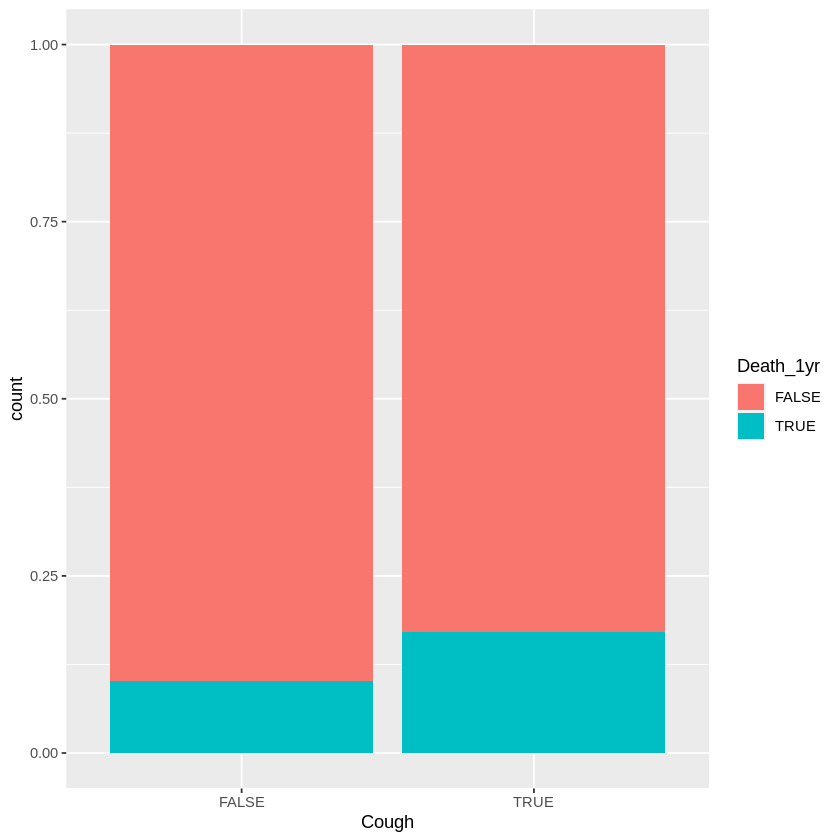

In [7]:
ggplot(Thoracic, aes(fill = Death_1yr, x = Cough)) + 
 geom_bar(position = "fill") 

This plot is able to show the relationship between if a cough was present at surgery and if the patient survived after 1 year. In this plot, True represents when the patient has died within the first year after surgery, and false if the patient has survived. According to this plot, the patient has a higher chance of dying if they have a cough at the time of surgery. A cough at surgery increases the likelyhood of death after one year. 

## Statistical Analysis

**Statistical analysis**:  
You should use three separate methods to model the response. For each method:
* identify the method being used
* if appropriate, briefly describe how the model was fit, including the choice of variables
* provide some indication of how well the model performed

### Decision Tree - Classification Tree

Fitting a Classification Tree using the entire `Thoracic` dataset to predict `Death_1yr`.


Regression tree:
tree(formula = Death_1yr ~ ., data = Thoracic)
Variables actually used in tree construction:
[1] "Diagnosis"   "Tumor_Size"  "Smoking"     "Diabetes"    "Dyspnoea"   
[6] "FVC"         "Age"         "FEV1"        "Performance"
Number of terminal nodes:  17 
Residual mean deviance:  0.09363 = 42.42 / 453 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.80000 -0.07843 -0.05714  0.00000 -0.01370  0.98630 

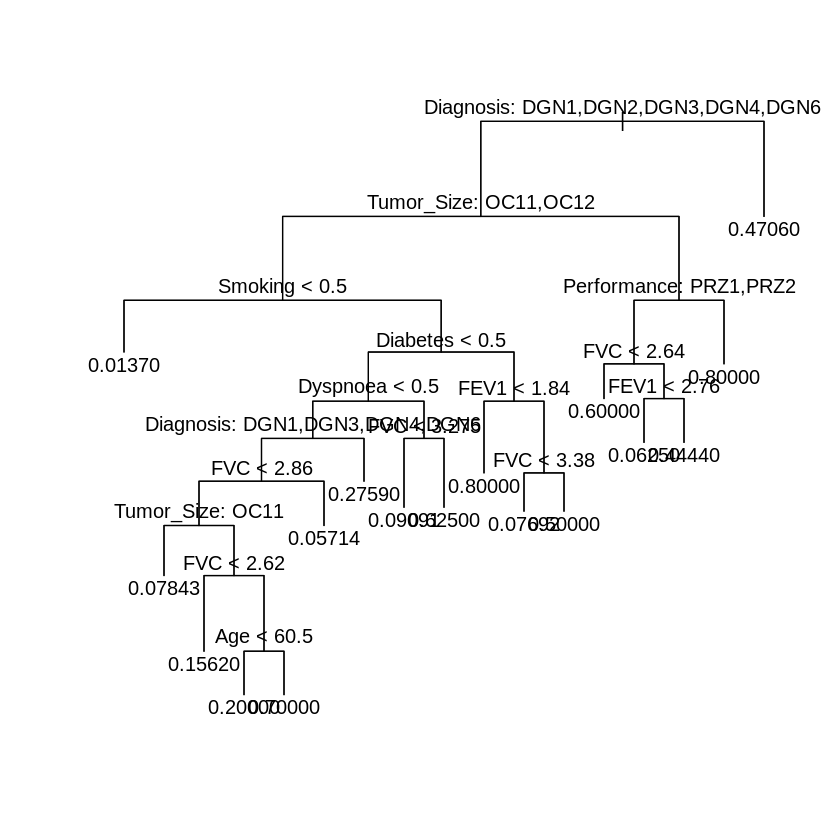

In [8]:
tree.Thoracic = tree(Death_1yr ~ . , data = Thoracic)
summary(tree.Thoracic)
plot(tree.Thoracic)
text(tree.Thoracic, pretty = 0)

A classification decision tree is used to visualize the probabilty of death after 1 year. The first split in the tree is Dianosis of DGN1, DGN2, DGN3, DGN4, DGN5, DGN6 which has a probability of 0.471. This suggests that the most important factor in determining death after the first year is the dianosis, and this is also able to reduce the error rate of the model by the most significant amount. The other splits in the tree futher reduce the error rate for having an incorrect decision. This tree has 16 terminal nodes. These terminal nodes are the nodes that are the end of the decision tree, or the nodes that predict the outcome. The residual mean deviance of this classification tree is 0.0936, this model is able to fit the data well.

### Logistic Regression Model

Fitting a logistic regression model to predict `Death_1yr` using the variables of `Age`, `Cough`, `Weakness`, `Pain`, `Diabetes`, `Smoking`, `Asthma`, and `FVC` with the coefficient estimates

In [9]:
model1 = lm(Death_1yr ~ Age + Cough + Weakness + Pain + Diabetes + Smoking + Asthma + FVC, data = Thoracic)
summary(model1)


Call:
lm(formula = Death_1yr ~ Age + Cough + Weakness + Pain + Diabetes + 
    Smoking + Asthma + FVC, data = Thoracic)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36093 -0.16075 -0.13683 -0.07808  0.97695 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.0955092  0.1584351   0.603   0.5469  
Age          -0.0003549  0.0020140  -0.176   0.8602  
CoughTRUE     0.0465749  0.0367160   1.269   0.2053  
WeaknessTRUE  0.0588099  0.0458825   1.282   0.2006  
PainTRUE      0.0967013  0.0662089   1.461   0.1448  
DiabetesTRUE  0.1382474  0.0627824   2.202   0.0282 *
SmokingTRUE   0.0694350  0.0438021   1.585   0.1136  
AsthmaTRUE   -0.1024975  0.2516266  -0.407   0.6839  
FVC          -0.0120094  0.0197329  -0.609   0.5431  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3534 on 461 degrees of freedom
Multiple R-squared:  0.03364,	Adjusted R-squared:  0.01687 
F-statistic: 2.006 on 8 and 461 DF

A logistic regression model, is able to resprent how much each variable affects the number of rings present. This model includes Sex, Height, Length, Diameter and Shell_weight. This model is able to give us a regression equation that is equal to 
`Death_1yr = 0.0955 - 0.00035Age + 0.04657Cough + 0.0588Weakness + 0.0967Pain + 0.1382Diabetes + 0.0694Smoking - 0.1025Asthma - 0.012FVC`. 
This represents the probability of death after 1 year. Based on this model, the variable that has the most impact on the probability of death is if the patient has diabetes. This can be seen because this variable has the largest slope coefficeint in the model, with a value of 0.138, or a probability of 13.8%. This value represents the probabilty increase in death if the patient had diabetes. The variable that reduces the probability of death is if the patient has asthma. If the patient has asthma at the time of surgry, the probability of death decreasaes by 10%
The data for this model for about 3% of the variation found within the data, and this model was not able to fit the data well.

### Random Forest

Random Forest Producedure is used to analyze the `Thoracic` dataset

In [10]:
set.seed (2)
train = sample(1:nrow(Thoracic), nrow(Thoracic)/2)
thoracic.test = Thoracic[-train, ]

In [11]:
rf.death = randomForest(Death_1yr ~., data= Thoracic, subset = train, importance = TRUE)
rf.death

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = Death_1yr ~ ., data = Thoracic, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1329525
                    % Var explained: -2.49

The random forest method is used by randomly selecting a subset of predictor variables for consideration each time is chooses a variable on which to split. This model is able to account for -2.49% of the variance found in this model. This variance explained value doesn't make sense because the variance of a model can not be smaller than zero. This model does not make sense for the data.

### Classificaion Tree with Training Data

Fitting a Classification Tree using the `Thoracic` dataset, with the `train`subset to predict `Death_1yr`.


Regression tree:
tree(formula = Death_1yr ~ ., data = Thoracic, subset = train)
Variables actually used in tree construction:
[1] "Diagnosis"   "Dyspnoea"    "FVC"         "Tumor_Size"  "FEV1"       
[6] "Performance"
Number of terminal nodes:  15 
Residual mean deviance:  0.07797 = 17.15 / 220 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.833300 -0.056600 -0.016670  0.000000 -0.008333  0.983300 

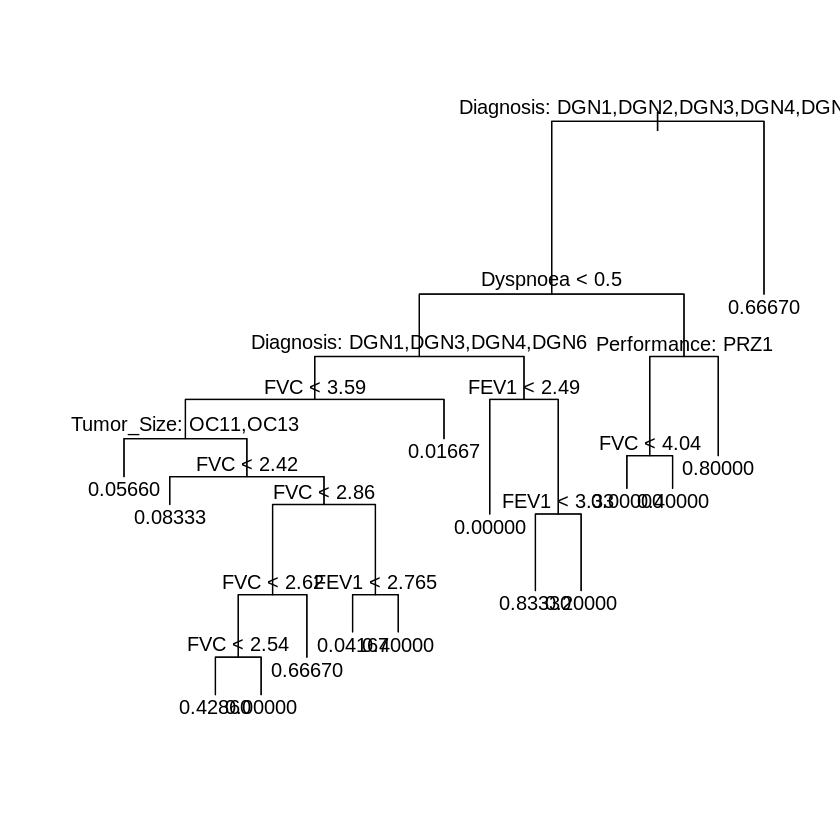

In [12]:
tree.death.train = tree(Death_1yr ~ . , data = Thoracic, subset = train)
summary(tree.death.train)
plot(tree.death.train)
text(tree.death.train, pretty = 0)

This classification tree is made from the training dataset, instead of the full dataset. This tree is used to visualize the probabilty of death after 1 year. The first split in the tree is Dianosis of DGN1, DGN2, DGN3, DGN4, DGN5, DGN6 which has a probability of 0.471. This suggests that the most important factor in determining death after the first year for the training data is the dianosis, and this is also able to reduce the error rate of the model by the most significant amount. The other splits in the tree futher reduce the error rate for having an incorrect decision. This tree has 15 terminal nodes. These terminal nodes are the nodes that are the end of the decision tree, or the nodes that predict the outcome. The classification tree made with training data has fewer terminal nodes than the tree made with the full dataset. The residual mean deviance of this classification tree is 0.07797, the training data is able to fit this tree very well. 

## Discussion

We can conclude that the probability of death after 1_yr can be predicted using classification models, given the Thoracic data. These models were able to show what variables affected the probability of death after 1 year. The variable that is most important in determining survival is Diagnosis according to the Classification trees, or diabetes according to the Logistic Regression Model. The best model that was computed was the Classification tree, which had a residual mean deviance of 0.096 for the full tree, or a residual mean diffrence of 0.07797 for the training classification tree. The model that least fit and explained the data was the Random forest technique. This model did not fit the data well or predict the probability properly. This is known because the variance explained by this model is -2.49% which is not possible. Variance can not be less than zero. Another model that did not fit the data was the logistic regression model, which only accounted for 3% of the variation found in the data. This model is not able to explain the variation found very well. It can be concluded that there is better models thsat can be used to predict `death_1yr` than the random forest method and a Logistic Regression Model. When comparing the tqo versions of the classification tree, there are some diffrences to note. The classification tree made with training data has 15 terminal nodes, which is fewer than the 16 terminal nodes than the tree made with the full dataset had. The residual mean deviance of this classification tree is 0.07797, comapred to the 0.096 found on the full tree. Both the full data and the training data is able to fit there respective trees very well. The probability of survival after surgery for the first year can be predicted using the data from the Thoracic file including the Diagnosis variable using a classification tree.